# Healthcare Access and Disease Burden Analysis
**Question 3** of the Uganda Christian University MSDS MTH8203 project-based exam. This notebook analyzes a dataset of healthcare access and disease burden in African countries, performing data cleaning, exploratory data analysis (EDA), and visualizations. The cleaned dataset is saved as `cleaned_dataset.csv`, and a data-driven narrative is provided for a public health audience

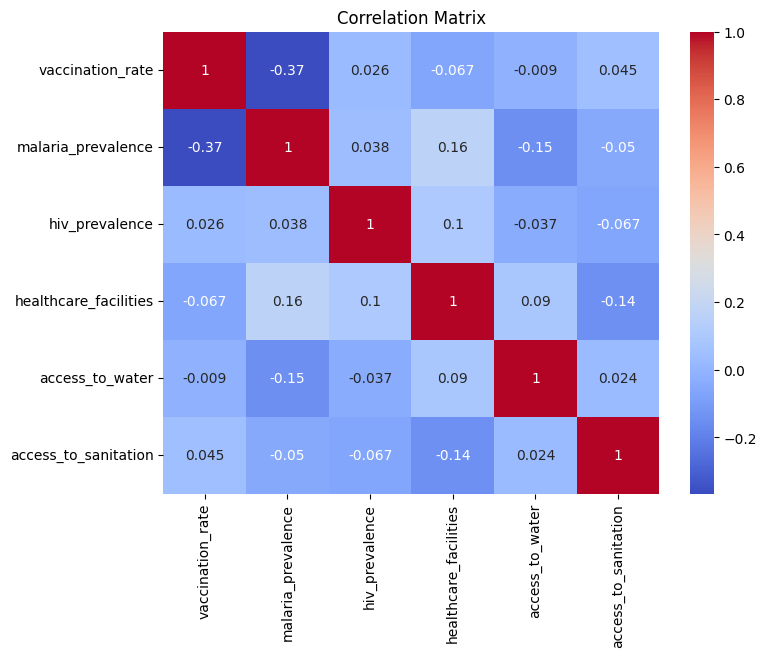

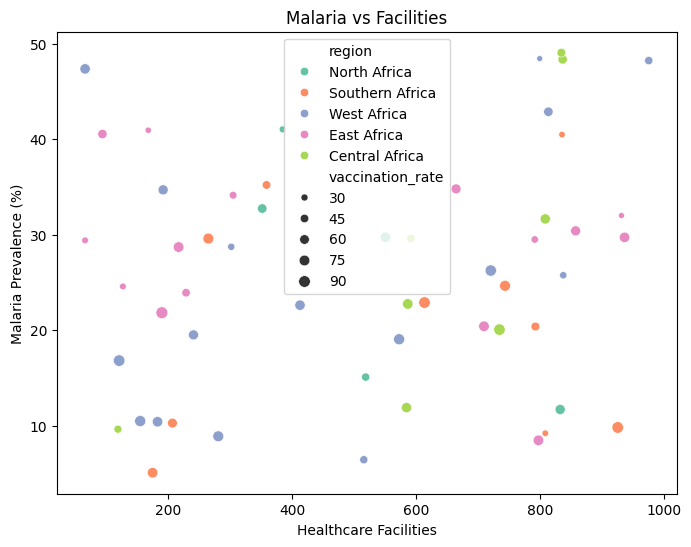

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_africa_health_data.csv")
num_df = df.select_dtypes(include=['float64','int64'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='healthcare_facilities',
    y='malaria_prevalence',
    hue='region',
    size='vaccination_rate',
    palette='Set2'
)
plt.title("Malaria vs Facilities")
plt.xlabel("Healthcare Facilities")
plt.ylabel("Malaria Prevalence (%)")
plt.show()




In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

df = pd.read_csv("cleaned_africa_health_data.csv")
metrics = ['vaccination_rate','malaria_prevalence','hiv_prevalence','healthcare_facilities','access_to_water','access_to_sanitation']
results = []

for x in metrics:
    for y in metrics:
        if x >= y:
            continue
        pearson_r, pearson_p = pearsonr(df[x], df[y])
        spearman_r, spearman_p = spearmanr(df[x], df[y])
        results.append({
            'x': x, 'y': y,
            'pearson_r': pearson_r, 'pearson_p': pearson_p,
            'spearman_r': spearman_r, 'spearman_p': spearman_p
        })

res_df = pd.DataFrame(results)
print(res_df.sort_values('pearson_p').head(10))


                        x                      y  pearson_r  pearson_p  \
0      malaria_prevalence       vaccination_rate  -0.366615   0.006398   
4   healthcare_facilities     malaria_prevalence   0.164005   0.236005   
7         access_to_water     malaria_prevalence  -0.152303   0.271578   
13   access_to_sanitation  healthcare_facilities  -0.144941   0.295695   
5   healthcare_facilities         hiv_prevalence   0.101850   0.463656   
9         access_to_water  healthcare_facilities   0.089915   0.517899   
12   access_to_sanitation         hiv_prevalence  -0.067249   0.628981   
3   healthcare_facilities       vaccination_rate  -0.066879   0.630873   
11   access_to_sanitation     malaria_prevalence  -0.050054   0.719264   
10   access_to_sanitation       vaccination_rate   0.045374   0.744582   

    spearman_r  spearman_p  
0    -0.404536    0.002413  
4     0.200846    0.145320  
7    -0.167067    0.227252  
13   -0.154075    0.265975  
5     0.094572    0.496362  
9     0.088

There is a moderate, statistically significant negative correlation between malaria_prevalence and vaccination_rate (pearson_r ≈ −0.37, p ≈ 0.006). This also supported by Spearman (r ≈ −0.40, p ≈ 0.002), indicating higher vaccination rates link to lower malaria prevalence in the listed countries.


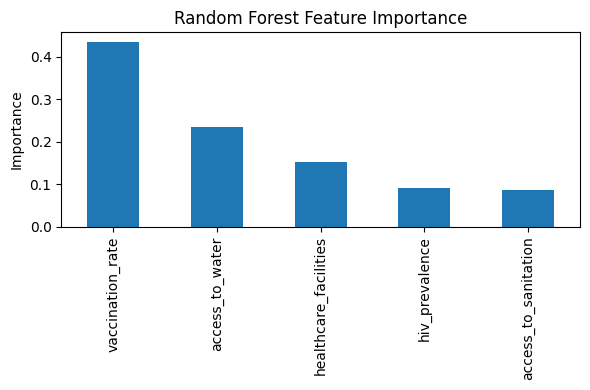

In [7]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
feat_imp.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


##Insights:

Vaccination Rate is the most influential factor, suggesting it has the strongest impact on the predicted outcome.
Access to Water also plays a significant role, though less than vaccination rate.
Healthcare Facilities, HIV Prevalence, and Access to Sanitation have lower but comparable importance, indicating they contribute moderately to the model.